<a href="https://colab.research.google.com/github/gopalchettri/DeepLearning/blob/master/1_d_Tensorflow_Basic_Neural_Network_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Neural Network MNIST classification using Tensorflow**

Image batch shape: (32, 28, 28)
Label batch: [9 5 1 2 9 9 4 0 1 9 0 1 4 8 3 9 0 3 5 7 3 3 0 0 2 0 7 8 2 9 4 0]


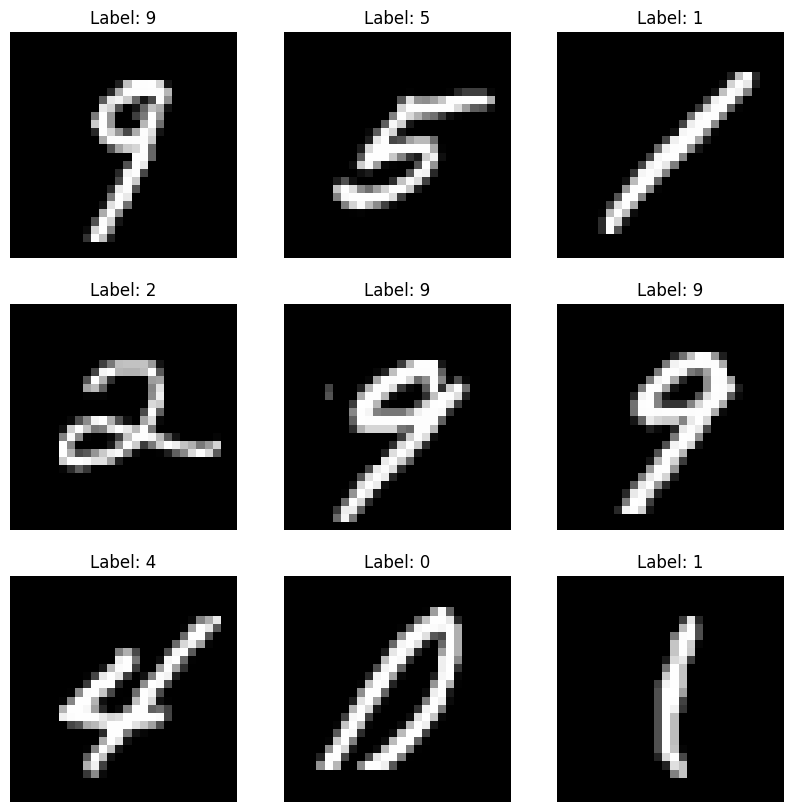

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7755 - loss: 0.7295
Epoch 1: saving model to training_1/mnist.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7756 - loss: 0.7290 - val_accuracy: 0.9217 - val_loss: 0.2635
Epoch 2/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9104 - loss: 0.2935
Epoch 2: saving model to training_1/mnist.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9104 - loss: 0.2934 - val_accuracy: 0.9428 - val_loss: 0.1881
Epoch 3/10
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9312 - loss: 0.2256
Epoch 3: saving model to training_1/mnist.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9312 - loss: 0.2256 - val_accuracy: 0.9498 - val_loss: 0.1651
Epoch 4/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9405 - loss: 0.1984
Epoch 4: saving model to training_1/mnist.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9405 - loss: 0.1983 - val_acc

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9573 - loss: 0.1379
Final test accuracy: 0.9626


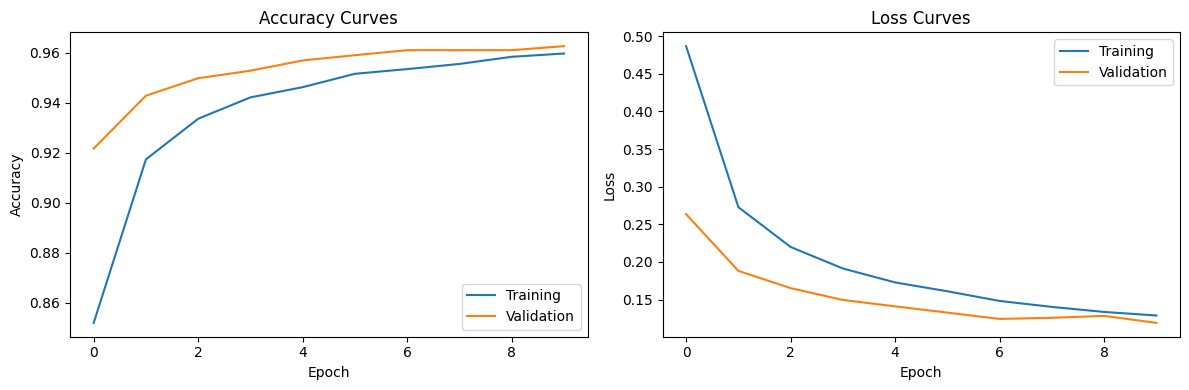

In [12]:
# Import required libraries
import os
import tensorflow as tf  # Core TensorFlow library for deep learning
from tensorflow.keras.datasets import mnist  # MNIST dataset loader
import matplotlib.pyplot as plt  # Visualization library
import numpy as np  # Numerical computing library
from tensorflow.keras.optimizers import Adam  # Adaptive Moment Estimation optimizer
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping callback

# Load MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()  # Load train/test split
X_train = X_train.astype('float32') / 255.0  # Normalize pixel values to [0,1]
X_test = X_test.astype('float32') / 255.0  # Same normalization for test set

# Create optimized data pipelines using tf.data API
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))  # Create base dataset
train_dataset = (train_dataset
                 .shuffle(buffer_size=1024)  # Shuffle with 1024-sample buffer
                 .batch(32)  # Create batches of 32 samples
                 .prefetch(tf.data.AUTOTUNE))  # Optimize prefetching

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)  # Test pipeline

# Define data augmentation transformations
def augment(image, label):
    """Enhances training data with random transformations"""
    image = tf.image.random_flip_left_right(image)  # Horizontal flip (50% chance)
    image = tf.image.random_brightness(image, max_delta=0.1)  # Brightness adjustment (±10%)
    return image, label  # Return modified image with original label

# Apply augmentation to training pipeline
augmented_train_dataset = train_dataset.map(
    augment,  # Apply augmentation function
    num_parallel_calls=tf.data.AUTOTUNE  # Parallelize processing
)

# Inspect augmented batch
for images, labels in augmented_train_dataset.take(1):
    print(f"Image batch shape: {images.shape}")  # Expected: (32, 28, 28)
    print(f"Label batch: {labels}")  # Corresponding digit labels

# Visualize augmented samples
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 3x3 grid
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().reshape(28, 28), cmap='gray')  # Reshape flattened image
    plt.title(f"Label: {labels[i]}")  # Show true label
    plt.axis('off')
plt.show()

# Construct neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 784-dim vector
    tf.keras.layers.Dense(128, activation='relu'),  # Fully-connected layer with ReLU
    tf.keras.layers.Dropout(0.2),  # Regularization: drop 20% of neurons
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with class probabilities
])

# Configure model training parameters
model.compile(
    optimizer=Adam(
        learning_rate=0.001,  # Adaptive Moment Estimation optimizer, lower learning rate
        beta_1=0.9,           # Exponential decay rate for the first moment estimates
        beta_2=0.999,         # Exponential decay rate for the second moment estimates
        epsilon=1e-07,        # Small constant for numerical stability
        amsgrad=False         # Whether to apply AMSGrad variant of Adam
        ),
    loss='sparse_categorical_crossentropy',  # Loss for integer labels
    metrics=['accuracy' ]  # Track  classification accuracy
)

# Since we're only saving weights, we should use the .weights.h5 extension.
# If we're saving the whole model, we would use the .keras extension instead
checkpoint_path = "training_1/mnist.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
# Define early stopping
# It monitors validation loss and stops training if it doesn't improve for 3 consecutive epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model with validation
history = model.fit(
    augmented_train_dataset,  # Augmented training data
    batch_size=32,  # Batch size for training
    epochs=10,  # Full passes through dataset
    validation_data=test_dataset,  # Evaluate on test set after each epoch
    verbose=1,
    callbacks=[cp_callback, early_stopping] # Pass callback to training
)

# Display the model architecture
model.summary()
# Save the entire model in SavedModel format
from google.colab import drive
drive.mount('/content/drive')

# Define the directory path
save_dir = '/content/drive/My Drive/models/'

# Create the directory if it doesn't exist
# exist_ok=True prevents an error if the directory already exists
#os.makedirs(save_dir, exist_ok=True)

# Save to Google Drive
model.save(os.path.join(save_dir, 'mnist_model.h5'))
# Save the entire model in the recommended .keras format
model.save(os.path.join(save_dir, 'my_model.keras'))


# Evaluate final model performance
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Final test accuracy: {test_accuracy:.4f}")  # Format to 4 decimal places

# Visualize training metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
